<a href="https://colab.research.google.com/github/ketanp23/scsd-ddm-class/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("prostate.csv")
df.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0


Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier than variables that are on a small scale.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('Target', axis=1))
scaled_features = scaler.transform(df.drop('Target',
                                           axis=1))

df_feat = pd.DataFrame(scaled_features,
                       columns=df.columns[:-1])
df_feat.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.867655,-1.047571,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.867655,0.344407,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.867655,-1.047571,-0.868957,-1.834631


Now by using the sklearn library implementation of the KNN algorithm we will train a model on that. Also after the training purpose, we will evaluate our model by using the confusion matrix and classification report.

In [5]:
from sklearn.metrics import classification_report,\
    confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test,\
    y_train, y_test = train_test_split(scaled_features,
                                       df['Target'],
                                       test_size=0.30)

# Remember that we are trying to come up
# with a model to predict whether
# someone will Target or not.
# We'll start with k = 1.

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
# Let's evaluate our KNN model !
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19  5]
 [ 3  3]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.62      0.65      0.63        30
weighted avg       0.77      0.73      0.75        30



Elbow Method
Let's go ahead and use the elbow method to pick a good K Value.

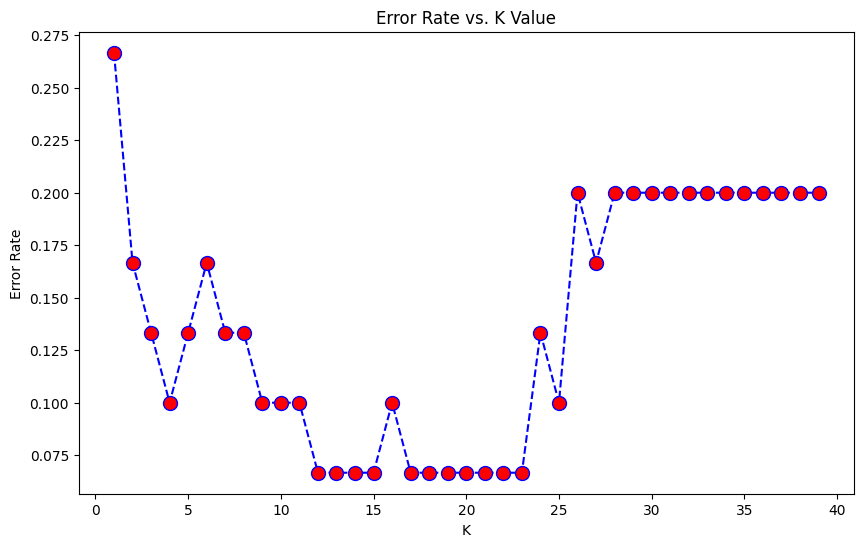

In [6]:
error_rate = []

# Will take some time
for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Here we can observe that the error value is oscillating and then it increases to become saturated approximately. So, let's take the value of K equal to 10 as that value of error is quite redundant.

In [7]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 1')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))

WITH K = 1
Confusion Matrix
[[19  5]
 [ 3  3]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.62      0.65      0.63        30
weighted avg       0.77      0.73      0.75        30



Now let's try to evaluate the performance of the model by using the number of clusters for which the error rate is the least.

In [8]:
# NOW WITH K = 10
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 10')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))

WITH K = 10
Confusion Matrix
[[22  2]
 [ 1  5]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.71      0.83      0.77         6

    accuracy                           0.90        30
   macro avg       0.84      0.88      0.85        30
weighted avg       0.91      0.90      0.90        30



Great! We squeezed some more performance out of our model by tuning it to a better K value.